In [1]:
include("../src/SPECTrecon.jl")

Main.SPECTrecon

In [2]:
using MIRTjim: jim
using ImageFiltering: centered, imfilter
using Plots: savefig
using Main.SPECTrecon: fft_conv

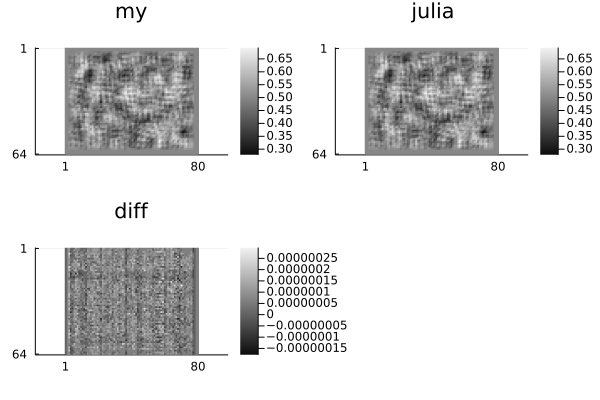

In [3]:
M = 80
N = 64
T = Float32
img = ones(T, M, N) * T(0.5) # replicate padding
img[5:M-5, 5:N-5] .= rand(T, 71, 55)
ker = rand(T, 5, 5)
ker .+= ker'
ker .+= reverse(ker)
ker /= sum(ker)
my = fft_conv(img, ker)
julia = imfilter(img, centered(ker), "circular")
jim(jim(my, "my"), jim(julia, "julia"), jim(my - julia, "diff"), gui=true)